In [1]:
import numpy as np
from keras.datasets import boston_housing
from keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# Dataset attribute info: http://lib.stat.cmu.edu/datasets/boston
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
print(f'train_data: {train_data.shape}')
print(f'train_targets: {train_targets.shape}')
print(f'test_data: {test_data.shape}')
print(f'test_targets: {test_targets.shape}')

train_data: (404, 13)
train_targets: (404,)
test_data: (102, 13)
test_targets: (102,)


In [3]:
mean = np.mean(train_data, axis=0)
train_data -= mean
std = np.std(train_data, axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [4]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(loss='mse', metrics=['mae'], optimizer='rmsprop')
    return model

In [5]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 80
print(f'k: {k}')
print(f'# of validation samples per training partition: {num_val_samples}')
print(f'# epochs: {num_epochs}')

k: 4
# of validation samples per training partition: 101
# epochs: 80


In [6]:
def evaluate_partition(i: int):
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
        axis=0,
    )
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]],
        axis=0,
    )
    print(f'val data: {val_data.shape}')
    print(f'val targets: {val_targets.shape}')
    print(f'partial train data: {partial_train_data.shape}')
    print(f'partial train targets: {partial_train_targets.shape}')
    model = build_model()
    history = model.fit(
        partial_train_data,
        partial_train_targets,
        batch_size=16,
        epochs=num_epochs,
        validation_data=(val_data, val_targets),
        verbose=0,
    )
    # val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0) # Using 'validation_data' instead.
    mae_history = history.history['val_mae']
    return mae_history

In [7]:
def k_fold_validation(k = k):
    all_mae_histories = []
    for i in range(k):
        print(f'--- calculating fold {i} ---')
        mae_history = evaluate_partition(i)
        all_mae_histories.append(mae_history)
    return all_mae_histories

In [8]:
all_mae_histories = k_fold_validation()

--- calculating fold 0 ---
val data: (101, 13)
val targets: (101,)
partial train data: (303, 13)
partial train targets: (303,)
--- calculating fold 1 ---
val data: (101, 13)
val targets: (101,)
partial train data: (303, 13)
partial train targets: (303,)
--- calculating fold 2 ---
val data: (101, 13)
val targets: (101,)
partial train data: (303, 13)
partial train targets: (303,)
--- calculating fold 3 ---
val data: (101, 13)
val targets: (101,)
partial train data: (303, 13)
partial train targets: (303,)


In [9]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

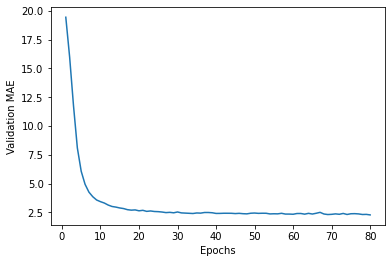

In [10]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [12]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(f'test mse score: {test_mse_score}')
print(f'test mae score: {test_mae_score}')

4/4 [==============================] - 0s 848us/step - loss: 20.4388 - mae: 2.7077
test mse score: 20.438806533813477
test mae score: 2.7077293395996094
